In [1]:
import warnings

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [5]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.shape

(1176, 35)

In [20]:
# We removed the columns as they contain redundant or non-informative data that do not contribute to the prediction model.
data = data.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

### EXPLORATION:
  - Looking at the information from our dataset, we see that we have 35 columns, of which 26 are numerical and 9 are categorical.
  - We also observe that there are no null values or duplicates.


In [22]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

4. Determinar el porcentaje de nulos

In [ ]:
print((data.isnull().sum()/ data.size)*100)

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>],
       [<Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>],
       [<Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'WorkLifeBalance'}>,

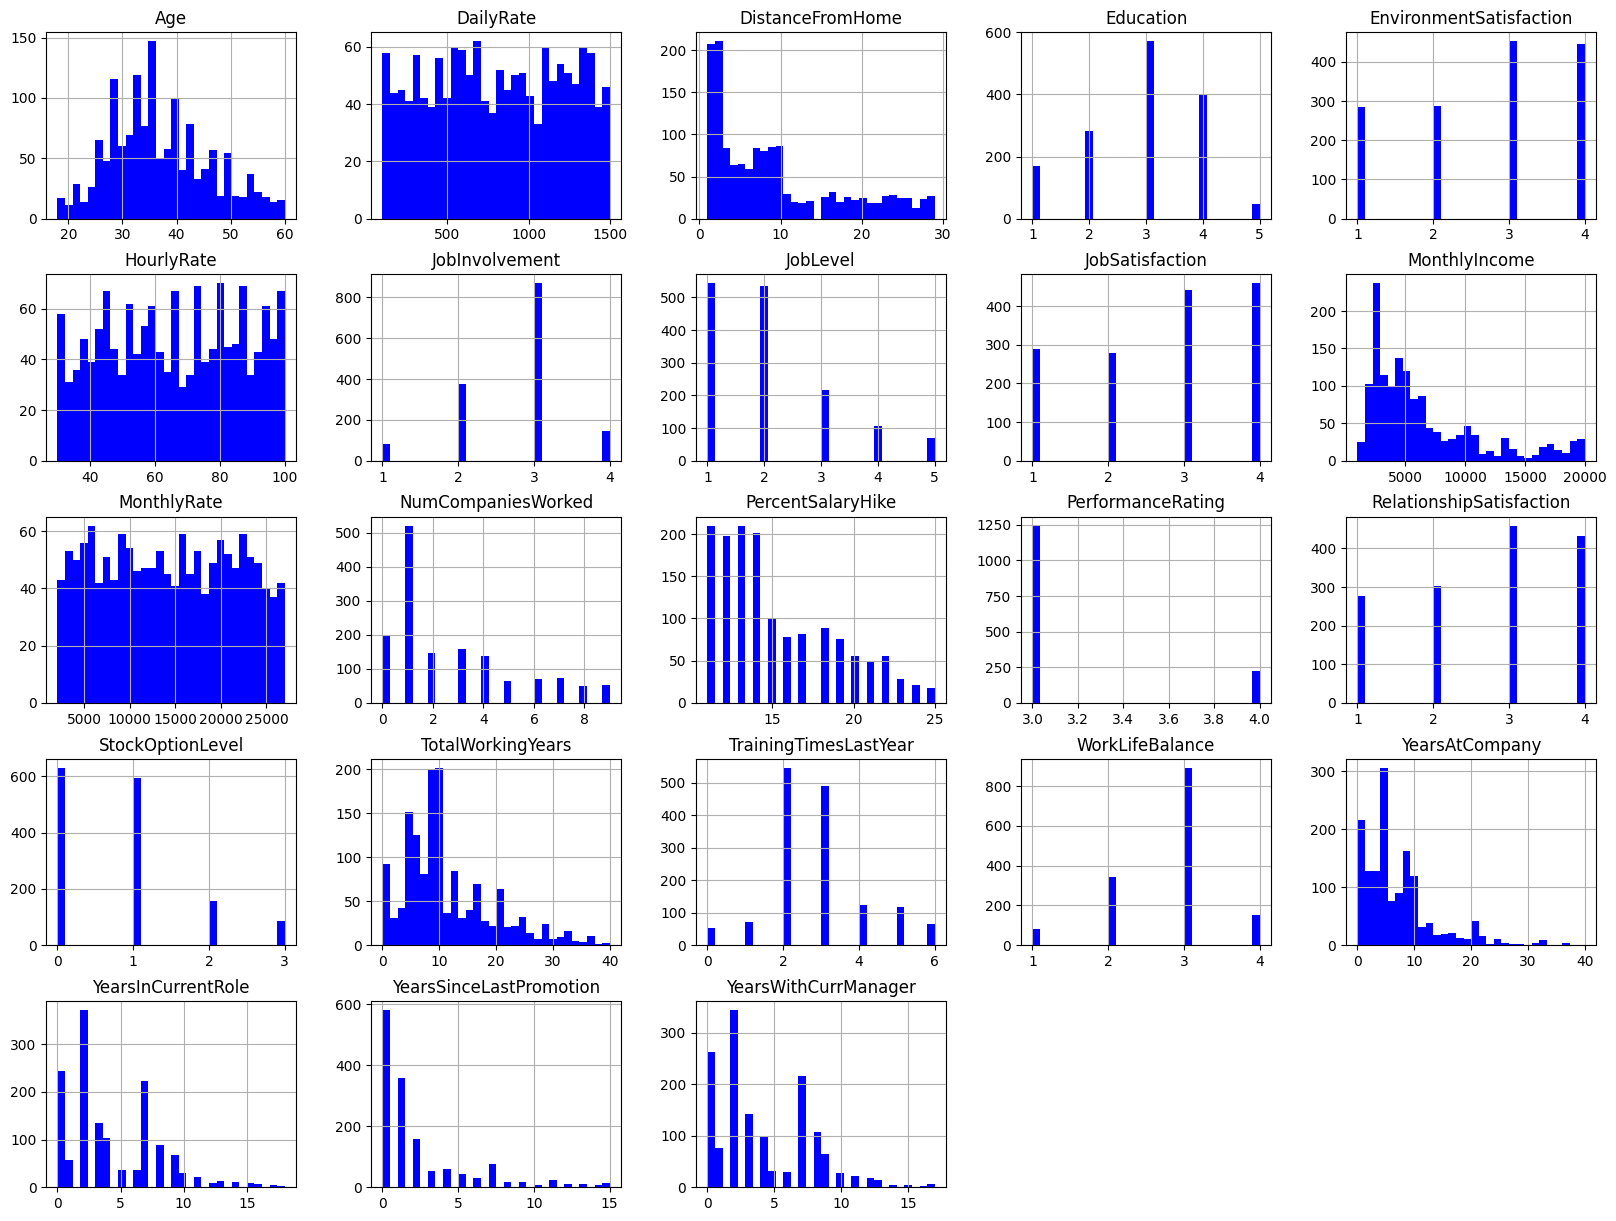

In [23]:
data.hist(bins=30, figsize=(20,15), color='b')

# 6. Análisis Univariado

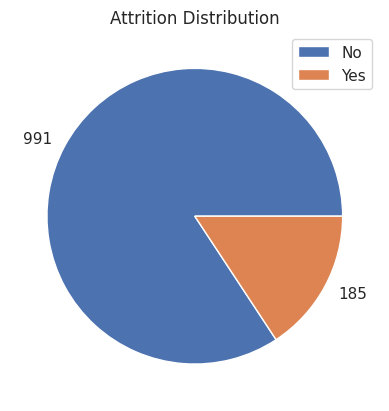

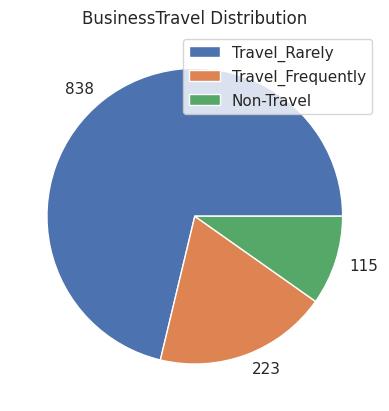

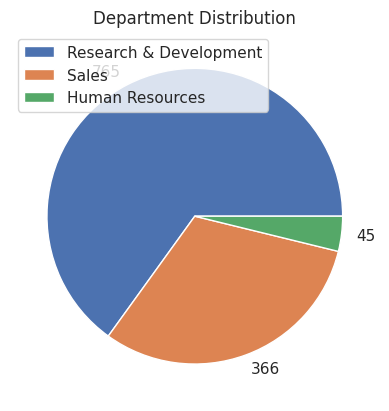

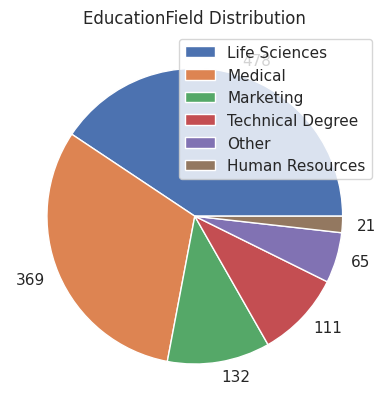

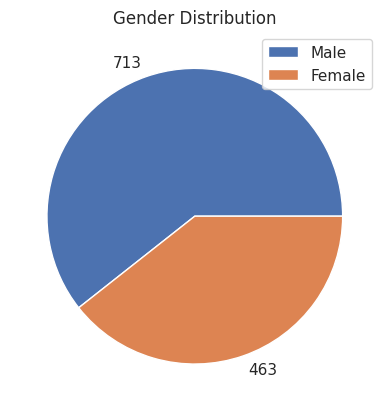

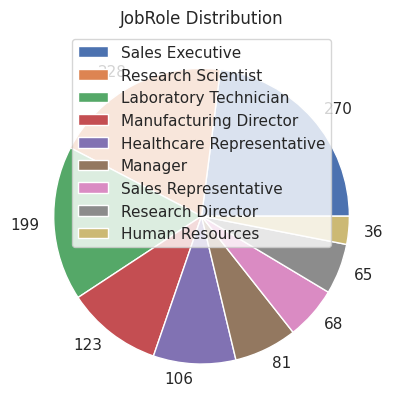

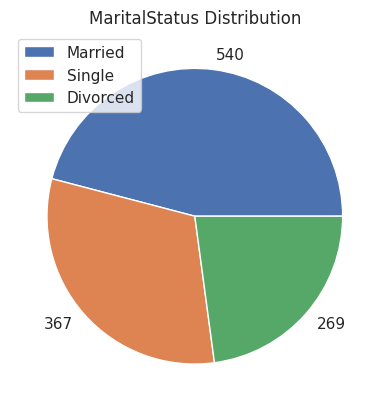

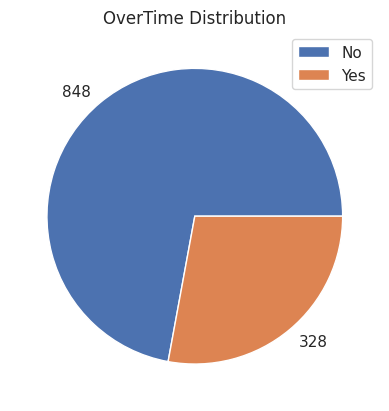

In [ ]:
data = data.drop(columns=['Over18'])
cat_cols = data.select_dtypes(['object']).columns
for col in cat_cols:
    plt.pie(data[col].value_counts(), labels=data[col].value_counts().values)
    plt.title(col+" Distribution")
    plt.legend(data[col].value_counts().index)
    plt.show()

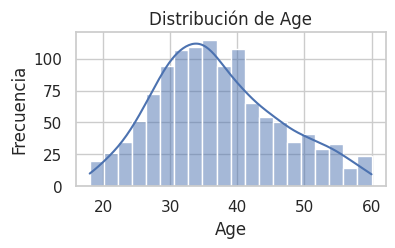

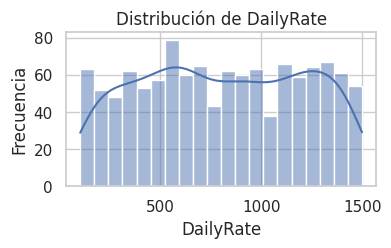

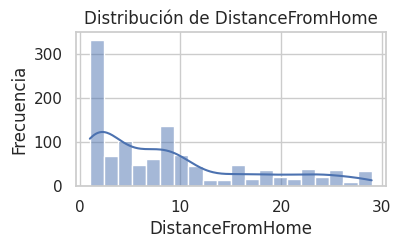

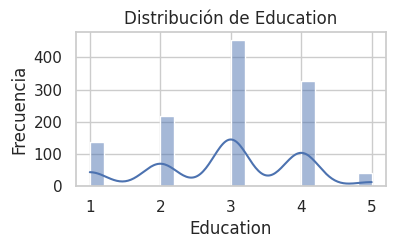

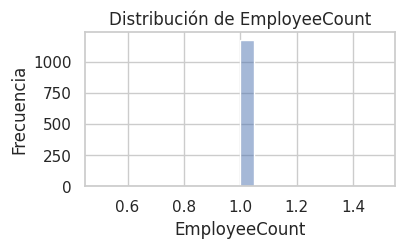

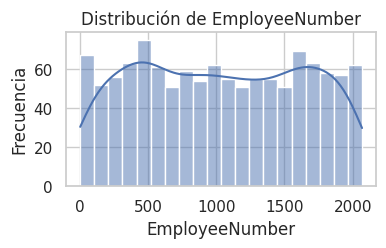

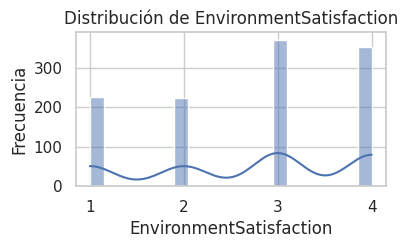

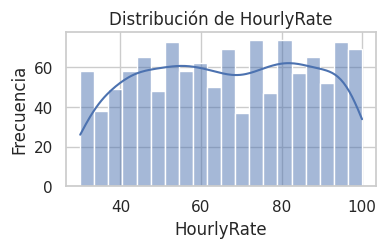

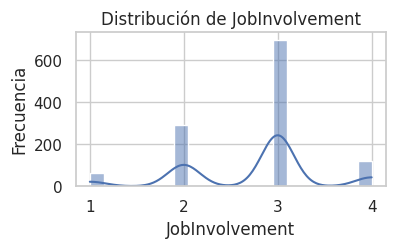

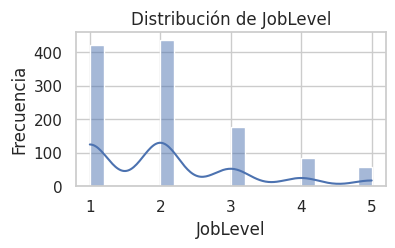

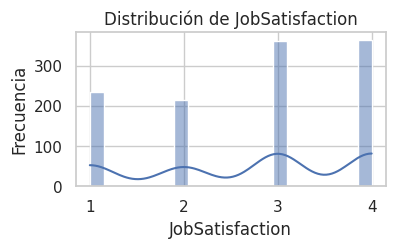

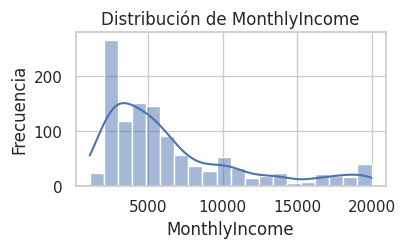

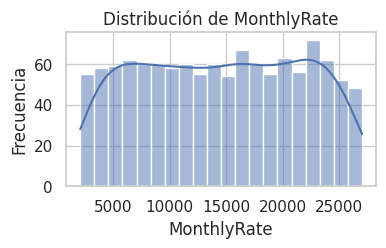

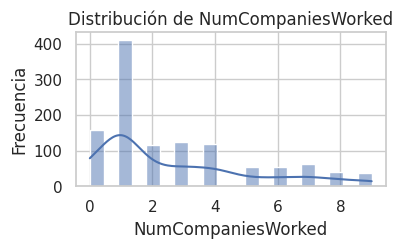

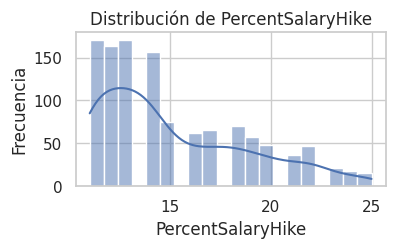

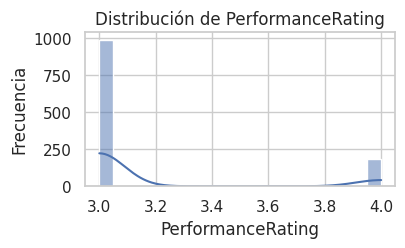

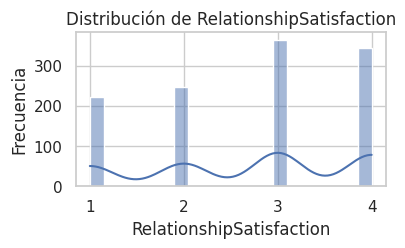

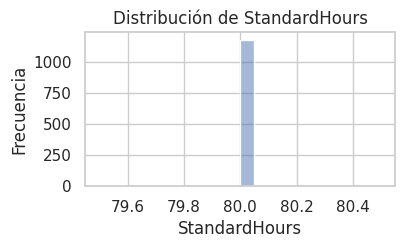

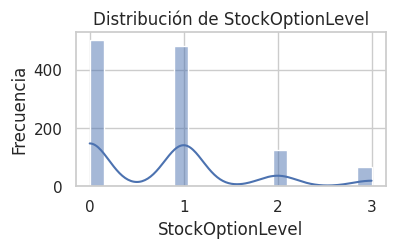

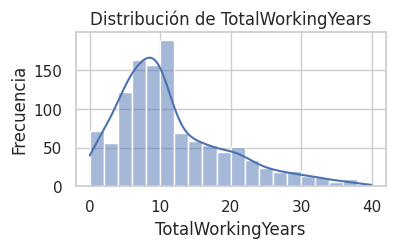

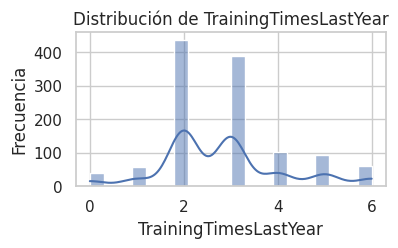

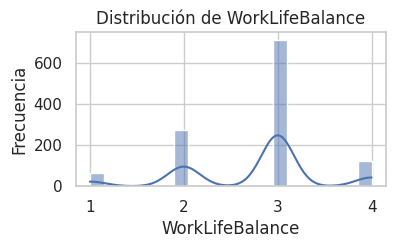

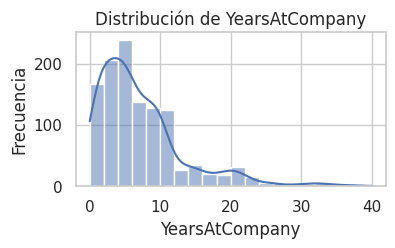

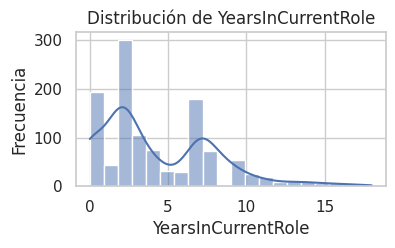

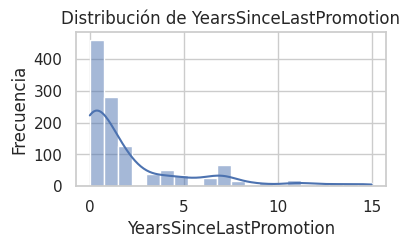

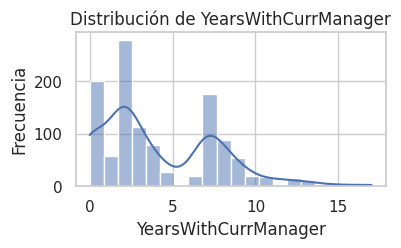

In [ ]:
# Seleccionar variables numéricas
numerical_columns = data.select_dtypes(include=['number']).columns

# Análisis de variables numéricas
for column in numerical_columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()



# 7. Análisis Bivariado

## 1 vs Target

<Axes: xlabel='Age', ylabel='Count'>

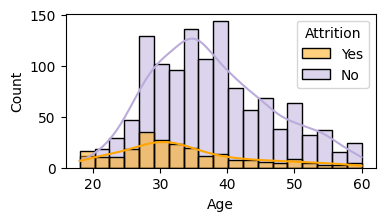

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.histplot(x='Age', hue='Attrition', data = data, kde=True, palette=custom_palette)



<Axes: xlabel='Gender', ylabel='count'>

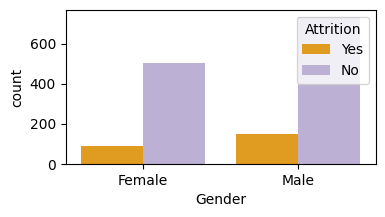

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='Gender', hue='Attrition', data = data, palette=custom_palette)


<Axes: xlabel='Education', ylabel='count'>

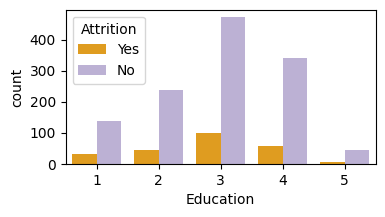

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='Education', hue='Attrition', data = data, palette=custom_palette)


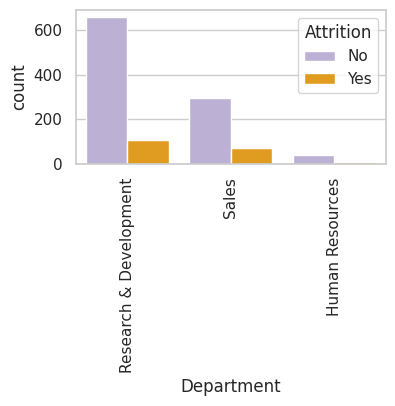

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='Department', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()


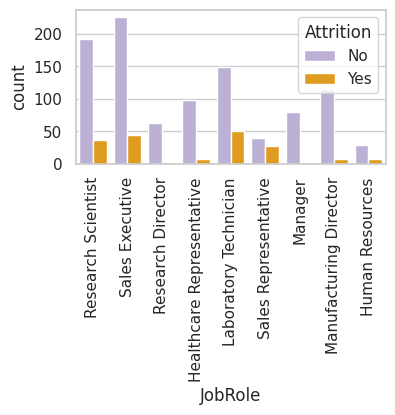

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='JobRole', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()



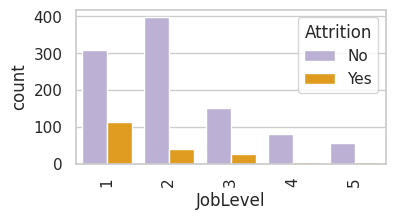

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='JobLevel', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()


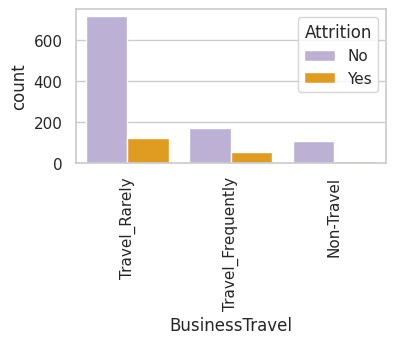

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='BusinessTravel', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()


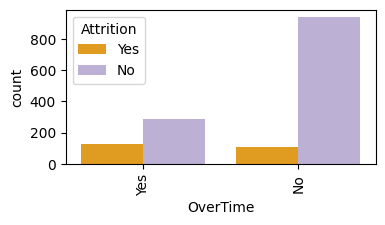

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='OverTime', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()


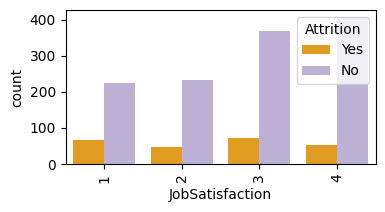

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='JobSatisfaction', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

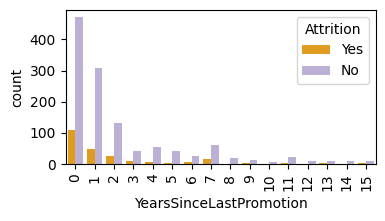

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()


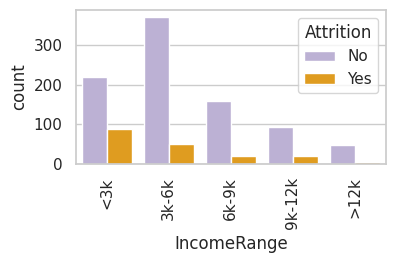

In [ ]:
bins = [0, 3000, 6000, 9000, 12000, 15000]
labels = ['<3k', '3k-6k', '6k-9k', '9k-12k', '>12k']
data['IncomeRange'] = pd.cut(data['MonthlyIncome'], bins=bins, labels=labels)

plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='IncomeRange', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()


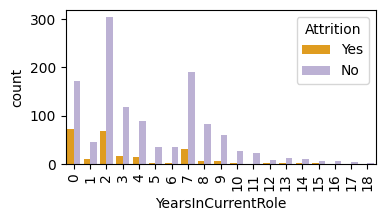

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

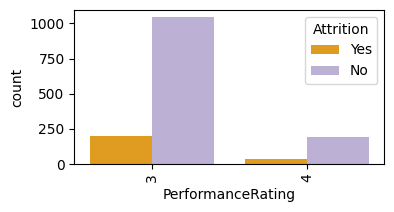

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='PerformanceRating', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

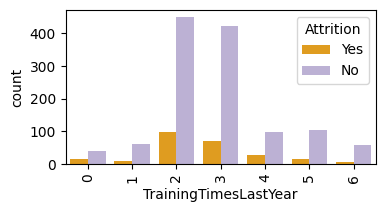

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='TrainingTimesLastYear', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

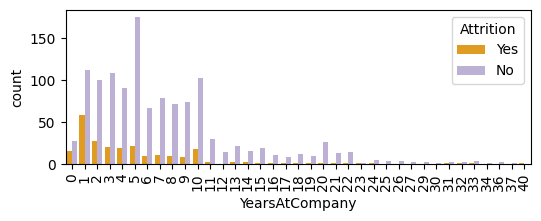

In [ ]:
plt.figure(figsize=(6, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='YearsAtCompany', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

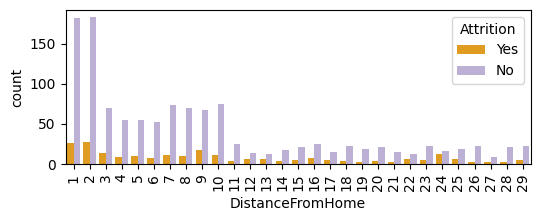

In [ ]:
plt.figure(figsize=(6, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='DistanceFromHome', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

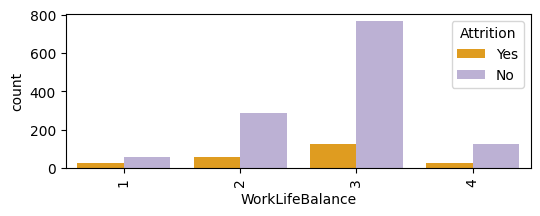

In [ ]:
plt.figure(figsize=(6, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='WorkLifeBalance', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

In [ ]:
table = pd.crosstab(data["JobRole"], data["Attrition"])
table["Average YearsInCurrentRole"] = table.apply(lambda x: data[(data["JobRole"] == x.name) & (data["Attrition"] == "No")]["YearsInCurrentRole"].mean(), axis=1)
table

Attrition,No,Yes,Average YearsInCurrentRole
JobRole,,,
Healthcare Representative,98,8,4.908163
Human Resources,29,7,4.068966
Laboratory Technician,149,50,3.496644
Manager,79,2,6.164557
Manufacturing Director,115,8,5.191304
Research Director,63,2,6.000000
Research Scientist,192,36,3.557292
Sales Executive,226,44,5.110619
Sales Representative,40,28,2.425000


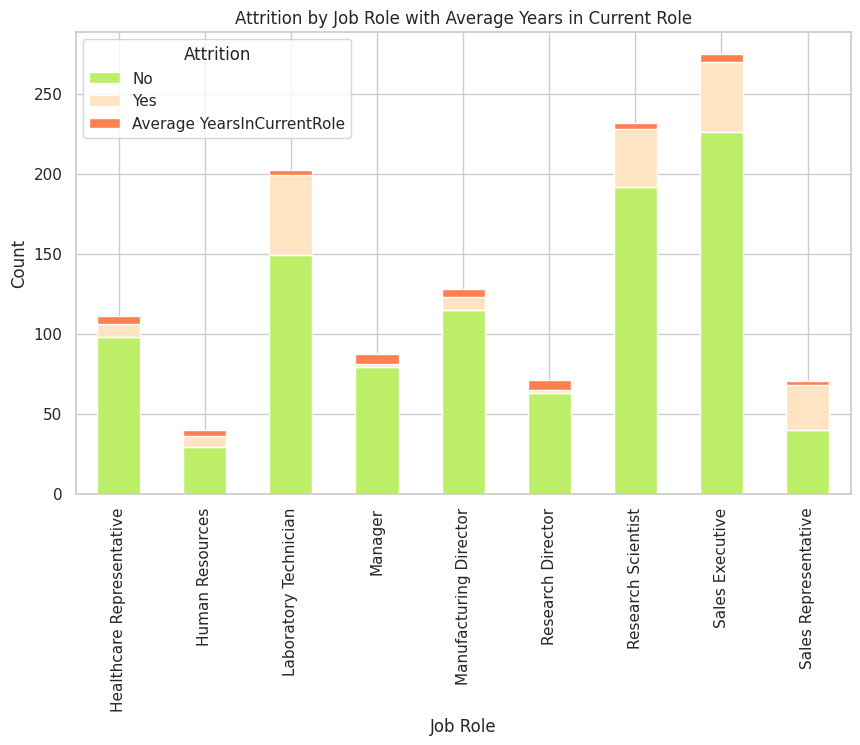

In [ ]:
table.plot(kind="bar", stacked=True, figsize=(10, 6) , color=['#BCEE68','#FFE4C4','#FF7F50'])

plt.xlabel("Job Role")
plt.ylabel("Count")
plt.title("Attrition by Job Role with Average Years in Current Role")

plt.show()

# OBSERVATIONS:

From the initial analysis of the obtained graphs, we can deduce:

  - Higher attrition rate among men: Men show a higher rate of leaving the company.
  - Age Range: Most employees are concentrated in the 26-35 age group.
  - Departments: The highest attrition is observed in R&D, followed by Sales, where Sales Executives are most likely to leave.
  - Overtime and Travel: Working overtime and traveling occasionally influence job abandonment.
  - Junior Employees: Employees in junior positions show higher attrition rates, often leaving within their first years.







In [6]:
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [8]:
# Seleccionar las columnas numericas
lista_num = data._get_numeric_data().columns
# Crear DF con las columnas numericas
data_num = data[lista_num]
# Crear DF con las columnas categoricas.
data_cat = data.drop(columns=data_num)

In [ ]:
# X=data_cat.drop(columns=['Attrition'])
# y=data_cat['Attrition']

Now we use One Hot Encoder which converts categorical variables into a binary matrix.

In [9]:
from sklearn.preprocessing import OneHotEncoder
# Identificar las columnas categóricas
categorical_columns = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus', 'OverTime',"Attrition"
]
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(data[categorical_columns])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

In [10]:
data_encoded = pd.concat([data_num, encoded_df], axis = 1)
data_encoded

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1466,39,613,6,1,1,2062,4,42,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1467,27,155,4,3,1,2064,2,87,4,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1468,49,1023,2,3,1,2065,4,63,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [11]:
# Renombrar las columnas
data_encoded = data_encoded.rename(columns={
    'OverTime_Yes': 'OverTime',
    'Attrition_Yes': 'Attrition'
})

 ## 9. Preselect the most important variables in the dataset: those most relevant to the prediction.



In [12]:
abs(data_encoded.corr()["Attrition"].sort_values(ascending=False).head(11))

Attrition                           1.000000
OverTime                            0.246118
MaritalStatus_Single                0.175419
JobRole_Sales Representative        0.157234
BusinessTravel_Travel_Frequently    0.115143
JobRole_Laboratory Technician       0.098290
Department_Sales                    0.080855
DistanceFromHome                    0.077924
EducationField_Technical Degree     0.069355
EducationField_Marketing            0.055781
NumCompaniesWorked                  0.043494
Name: Attrition, dtype: float64

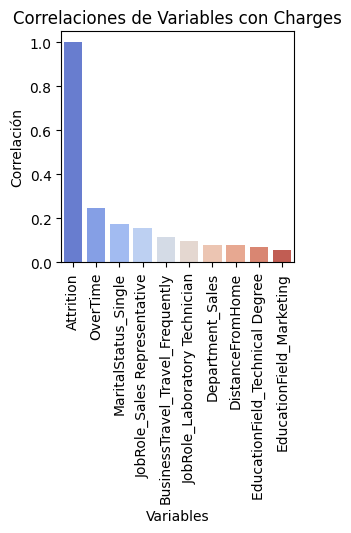

In [13]:
correlation_with_charges = data_encoded.corr()["Attrition"].sort_values(ascending=False).head(10)
plt.figure(figsize=(3, 3))
sns.barplot(x=correlation_with_charges.index, y=correlation_with_charges.values, palette='coolwarm')
plt.title('Correlaciones de Variables con Charges')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()

<Axes: >

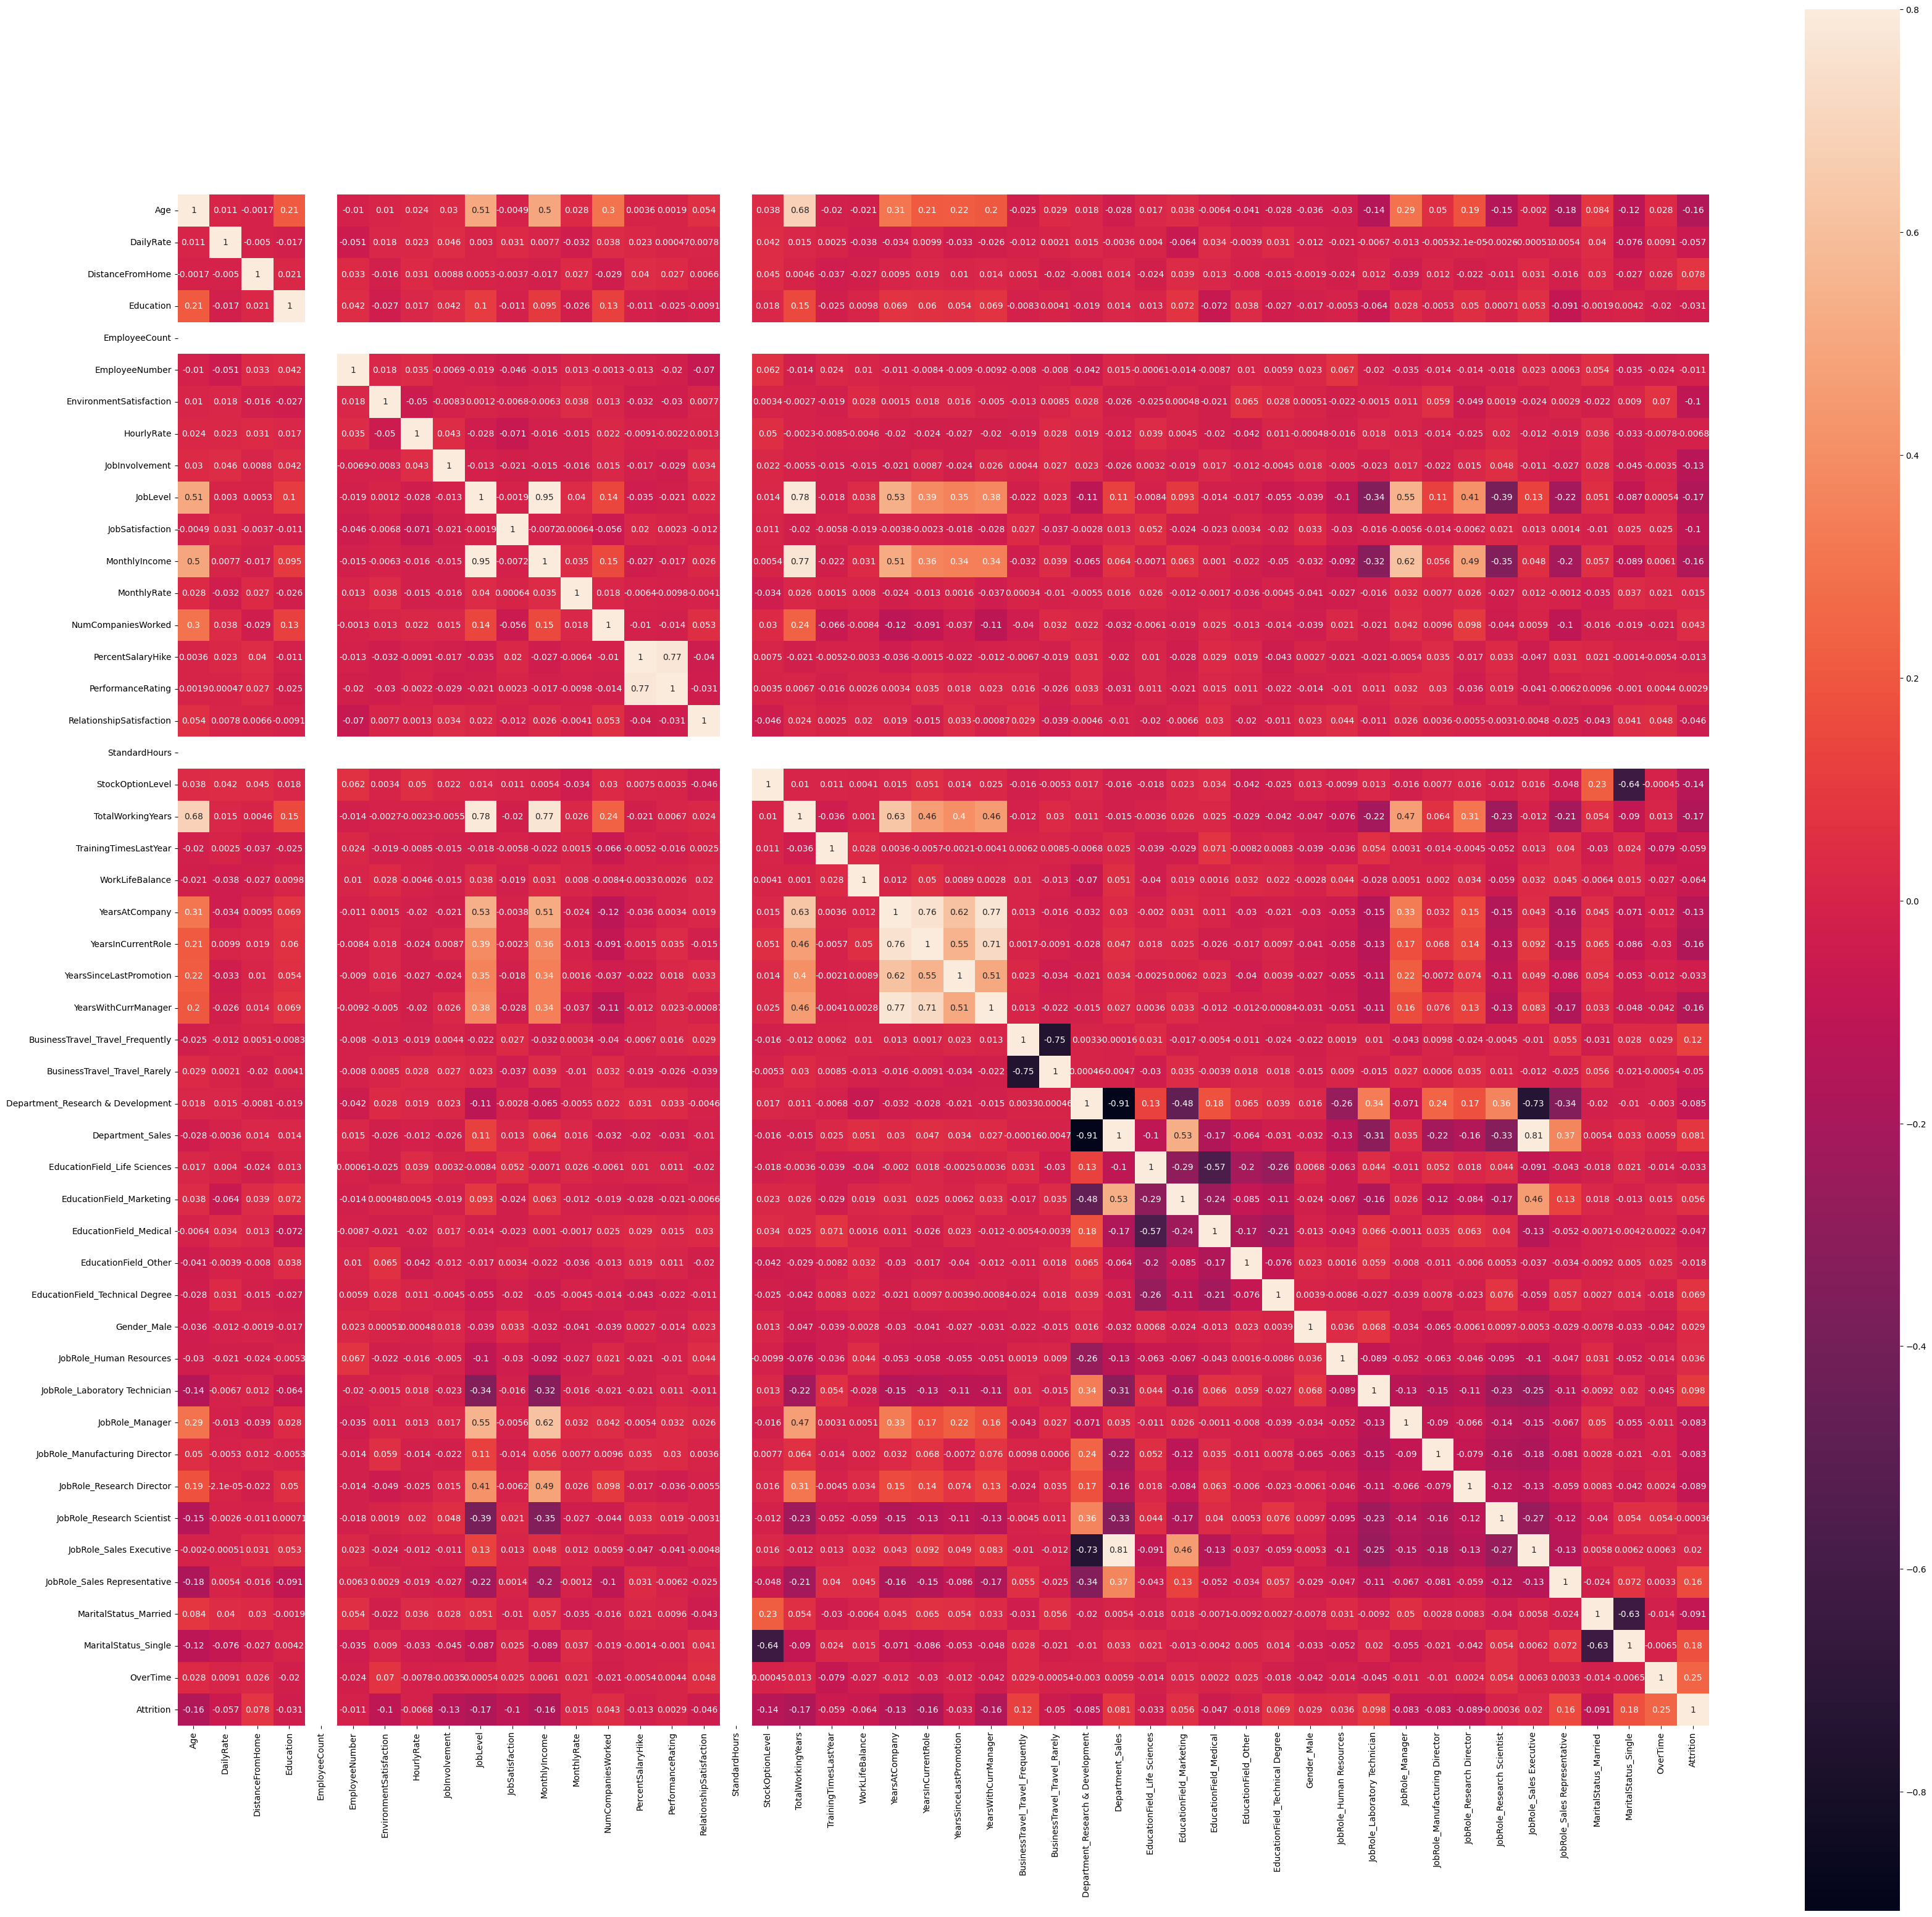

In [14]:
fig, ax = plt.subplots(figsize=(40,40))
x = data_encoded.corr()
sns.heatmap(x, vmax=.8, square=True, annot=True)
#Las mas claritas son las que tienen mas correlacion. # Cuando son binarias, las correlacciones son